[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jkitchin/s26-06642/blob/main/dsmles/00-introduction/introduction.ipynb)

In [14]:
! pip install -q pycse
from pycse.colab import pdf

# Module 00: Introduction

Welcome to Data Science and Machine Learning in Chemical Engineering!

## Learning Objectives

By the end of this module, you will:
1. Understand the scope and goals of the course
2. Set up your Python environment
3. Review essential Python concepts
4. Understand the machine learning workflow

## Why Data Science in Chemical Engineering?

Chemical engineers increasingly work with data:

- **Process data**: Sensor readings, control systems, quality measurements
- **Experimental data**: Lab results, catalyst testing, reaction optimization
- **Simulation data**: CFD, molecular dynamics, process modeling
- **Literature data**: Published properties, kinetic parameters, correlations

Machine learning provides tools to:
1. **Find patterns** in complex, high-dimensional data
2. **Build predictive models** without explicit physical equations
3. **Optimize processes** based on data-driven insights
4. **Quantify uncertainty** in predictions and measurements

## Course Overview

### Data Foundations (Modules 01-03)
- NumPy for numerical computing
- Pandas for data manipulation
- Visualization with Matplotlib

### Core Machine Learning (Modules 04-08)
- Dimensionality reduction (PCA, t-SNE)
- Regression (linear, regularized, nonlinear)
- Ensemble methods (Random Forests, Gradient Boosting)

### Advanced Topics (Modules 09-11)
- Clustering for unsupervised learning
- Uncertainty quantification
- Model interpretability

## Environment Setup

### Option 1: uv (Recommended)

[uv](https://docs.astral.sh/uv/) is a fast Python package manager. Install it first:

```bash
# macOS/Linux
curl -LsSf https://astral.sh/uv/install.sh | sh

# Windows
powershell -ExecutionPolicy ByPass -c "irm https://astral.sh/uv/install.ps1 | iex"
```

Then set up the project:

```bash
# Clone the course repository and cd into it
uv sync  # Creates virtual environment and installs all dependencies

# Activate the environment
source .venv/bin/activate  # On Windows: .venv\Scripts\activate

# Start JupyterLab
jupyter lab
```

### Option 2: Google Colab

Open notebooks directly in Colab using the rocket icon at the top of each page.

## Verify Installation

Run the following cell to check that everything is installed correctly:

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import pycse
import shap
import xgboost

print(f"NumPy: {np.__version__}")
print(f"Pandas: {pd.__version__}")
print(f"Scikit-learn: {sklearn.__version__}")
print(f"XGBoost: {xgboost.__version__}")
print("\nAll packages imported successfully!")

NumPy: 2.3.5
Pandas: 2.3.3
Scikit-learn: 1.8.0
XGBoost: 3.1.3

All packages imported successfully!


## Python Refresher

### Lists and Loops

In [16]:
# List of experimental temperatures (Kelvin)
temperatures = [300, 350, 400, 450, 500]

# Convert to Celsius using a loop
temps_celsius = []
for T in temperatures:
    temps_celsius.append(T - 273.15)

print("Celsius:", temps_celsius)

Celsius: [26.850000000000023, 76.85000000000002, 126.85000000000002, 176.85000000000002, 226.85000000000002]


In [17]:
# Better: List comprehension
temps_celsius = [T - 273.15 for T in temperatures]
print("Celsius:", temps_celsius)

Celsius: [26.850000000000023, 76.85000000000002, 126.85000000000002, 176.85000000000002, 226.85000000000002]


### Dictionaries

In [18]:
# Store experiment parameters
experiment = {
    'temperature': 400,  # K
    'pressure': 101.325,  # kPa
    'catalyst': 'Pt/Al2O3',
    'conversion': 0.85
}

print(f"At {experiment['temperature']} K, conversion was {experiment['conversion']:.1%}")

At 400 K, conversion was 85.0%


### Functions

In [19]:
def arrhenius_rate(T, A=1e13, Ea=80000, R=8.314):
    """
    Calculate reaction rate constant using Arrhenius equation.
    
    Parameters
    ----------
    T : float
        Temperature in Kelvin
    A : float
        Pre-exponential factor (1/s)
    Ea : float
        Activation energy (J/mol)
    R : float
        Gas constant (J/mol/K)
    
    Returns
    -------
    float
        Rate constant k
    """
    import numpy as np
    return A * np.exp(-Ea / (R * T))

# Calculate rate at different temperatures
for T in [300, 400, 500]:
    k = arrhenius_rate(T)
    print(f"k({T} K) = {k:.2e} 1/s")

k(300 K) = 1.18e-01 1/s
k(400 K) = 3.57e+02 1/s
k(500 K) = 4.39e+04 1/s


## The Machine Learning Workflow

Most ML projects follow this pattern:

```
1. Define the problem
   ↓
2. Collect and explore data
   ↓
3. Prepare data (cleaning, feature engineering)
   ↓
4. Choose and train models
   ↓
5. Evaluate and validate
   ↓
6. Interpret and communicate
   ↓
7. Deploy (if applicable)
```

This course covers steps 2-6, with emphasis on chemical engineering applications.

## Example: Predicting Reaction Yield

Let's preview what we'll be able to do by the end of the course.

**Problem**: Predict reaction yield from experimental conditions.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate synthetic experiment data
np.random.seed(42)
n_experiments = 100

# Experimental conditions
temperature = np.random.uniform(300, 500, n_experiments)  # K
pressure = np.random.uniform(1, 10, n_experiments)  # atm
catalyst_loading = np.random.uniform(0.01, 0.10, n_experiments)  # wt%

# "True" yield model (unknown to us in practice)
yield_true = (
    50 + 
    0.1 * (temperature - 400) + 
    2 * pressure + 
    100 * catalyst_loading +
    np.random.normal(0, 1.5, n_experiments)  # noise
)
yield_true = np.clip(yield_true, 0, 100)  # Yield between 0-100%

# Create DataFrame
data = pd.DataFrame({
    'temperature': temperature,
    'pressure': pressure,
    'catalyst_loading': catalyst_loading,
    'yield': yield_true
})

data.head(10)

,temperature,pressure,catalyst_loading,yield
0,374.908024,1.282863,0.067783,56.903170
1,490.142861,6.727694,0.017573,73.249533
2,446.398788,3.829204,0.024547,67.968861
3,419.731697,5.577136,0.090870,73.165308
4,331.203728,9.168098,0.064579,64.876717
5,331.198904,3.243630,0.010828,50.969605
6,311.616722,4.693446,0.019132,51.469129
7,473.235229,7.799960,0.069715,81.173609
8,420.223002,3.059183,0.010456,57.997440
9,441.614516,1.692819,0.024473,59.822258


Looking at the first 10 rows, we see that our "experiments" have a range of conditions:

- Temperatures span 300-500 K (a reasonable range for many chemical reactions)
- Pressures range from 1-10 atm
- Catalyst loadings are 1-10 wt%
- Yields vary from about 50-80%

This is synthetic data, but it mimics what you'd collect from a real experimental campaign. The question we want to answer: **can we predict yield from the operating conditions?**

### Step 1: Visualize the relationships

Before building a model, we should explore our data. How does yield depend on each variable? Let's plot it.

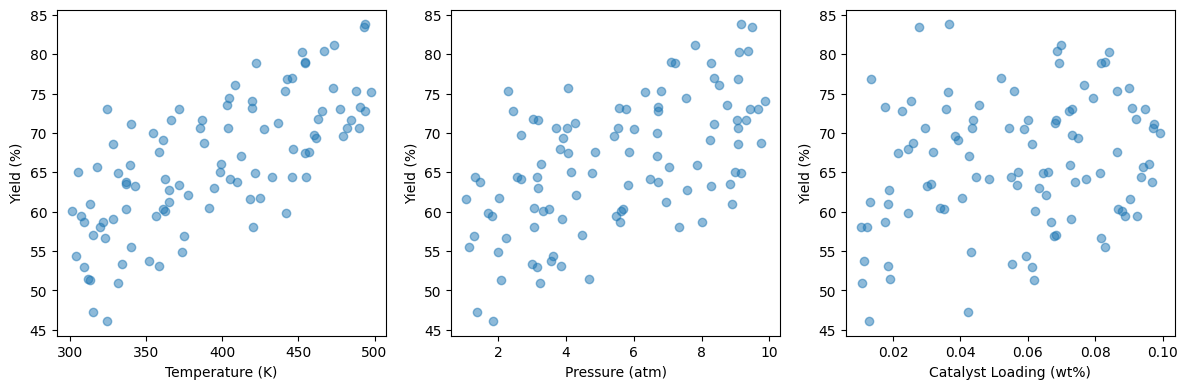

In [21]:
# Quick visualization
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].scatter(data['temperature'], data['yield'], alpha=0.5)
axes[0].set_xlabel('Temperature (K)')
axes[0].set_ylabel('Yield (%)')

axes[1].scatter(data['pressure'], data['yield'], alpha=0.5)
axes[1].set_xlabel('Pressure (atm)')
axes[1].set_ylabel('Yield (%)')

axes[2].scatter(data['catalyst_loading'], data['yield'], alpha=0.5)
axes[2].set_xlabel('Catalyst Loading (wt%)')
axes[2].set_ylabel('Yield (%)')

plt.tight_layout()
plt.show()

These scatter plots show positive trends between each input variable and yield:

- **Temperature**: Higher temperatures give higher yields (consistent with Arrhenius kinetics for many reactions)
- **Pressure**: The clearest trend—higher pressure improves yield (may shift equilibrium or increase reactant concentration)
- **Catalyst loading**: A positive but weaker trend—more catalyst improves conversion

The scatter in each plot tells us that no single variable fully explains yield. We need all three. This suggests a machine learning model could help.

### Step 2: Build a predictive model

Can we train a model to predict yield from temperature, pressure, and catalyst loading? We'll use a Random Forest—a powerful and flexible algorithm we'll study in detail later. For now, just observe the workflow.

In [22]:
# Build a simple model (we'll learn this properly later!)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data
X = data[['temperature', 'pressure', 'catalyst_loading']]
y = data['yield']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}%")
print(f"R²: {r2:.3f}")

RMSE: 2.81%
R²: 0.918


How do we interpret these numbers?

- **RMSE ≈ 2%**: Our predictions are typically within ±2 percentage points of actual yield. Since we added noise with σ=1.5, this is close to the theoretical limit—the model learned the signal, not the noise.
- **R² ≈ 0.93**: About 93% of the variance in yield is explained by our three variables. The remaining 7% is experimental noise.

For chemical engineering applications, R² > 0.9 is often excellent for real data. R² > 0.95 might indicate overfitting.

### Step 3: Visualize model performance

Numbers are useful, but a plot often reveals more. How do our predictions compare to actual values?

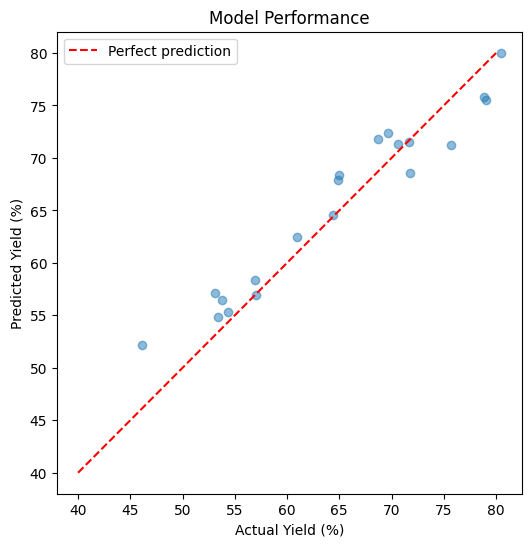

In [23]:
# Visualize predictions
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([40, 80], [40, 80], 'r--', label='Perfect prediction')
plt.xlabel('Actual Yield (%)')
plt.ylabel('Predicted Yield (%)')
plt.title('Model Performance')
plt.legend()
plt.axis('equal')
plt.show()

This "predicted vs actual" plot is a key diagnostic for regression models:

- **Perfect predictions** fall on the red dashed line
- **Points above the line**: model over-predicted
- **Points below the line**: model under-predicted

Our model shows points clustered around the diagonal with no systematic bias—this is what a good model looks like. In later modules, we'll see examples of problematic models and learn how to diagnose and fix them.

---

## The Catalyst Crisis: "The First Day"

*A connected story across all lectures. Follow Alex Chen, a career-changing grad student, as she and her team solve an industrial mystery using data science.*

---

Alex Chen stared at the welcome email on her laptop, reading it for the third time. *Welcome to the Data Academy. Your cohort has been selected to work on a real industrial problem: the ChemCorp Catalyst Crisis.*

Seven years. That's how long she'd spent at the Beaumont refinery before deciding to go back for her PhD. At 34, she was easily the oldest person in the orientation room. The student next to her—Maya, according to her name tag—was typing something into a terminal without even looking at her fingers.

"First time with Python?" Maya asked, noticing Alex's hesitation.

"That obvious?"

Maya shrugged. "Everyone starts somewhere. I'm trying to figure out what a yield curve actually means, so..."

Professor Pipeline walked to the front of the room, and the chatter died down. He was older than Alex expected, with the weathered look of someone who'd spent time in plants, not just classrooms.

"Welcome to the Data Academy," he said. "You're here because ChemCorp has a problem they can't solve. Their flagship reactor has been producing inconsistent batches for eighteen months. Good batches, bad batches, no apparent pattern. They've tried everything." He paused. "Everything except asking the data the right questions."

He clicked to a slide showing a time series—yield percentages bouncing between 40% and 95% with no visible pattern.

"By the end of this course, you'll solve this. Not me. You." He looked around the room. "Some of you know chemistry but not coding. Some of you know coding but not chemistry. None of you know everything. That's the point."

Alex felt her phone buzz. A text from her sister: *How's the first day? Feel like a genius yet?*

She typed back: *Feel like I'm in over my head.*

The response came immediately: *Good. That's where learning happens.*

After orientation, Alex lingered at the mystery board—a whiteboard where students would track clues throughout the semester. It was empty now, waiting.

*Eighteen months of bad batches*, she thought. *Someone's been staring at this data for eighteen months and seeing nothing.*

She wrote the first sticky note and placed it on the board: **What are we missing?**

It felt like a beginning.

*To be continued...*

## What's Next

In the upcoming modules, we'll learn:

1. **NumPy** - How to work with numerical data efficiently
2. **Pandas** - How to load, clean, and manipulate data
3. **Visualization** - How to explore and present data
4. **Regression** - How to build and validate predictive models
5. **Advanced methods** - How to handle complex, nonlinear relationships
6. **Uncertainty** - How to quantify confidence in predictions
7. **Interpretability** - How to understand what the model learned

Let's get started with NumPy in the next module!

## Summary

- Data science and ML are increasingly important in chemical engineering
- This course covers practical tools: NumPy, Pandas, scikit-learn, and more
- We follow a standard ML workflow: data → model → evaluation → interpretation
- All examples will use chemical engineering applications

---

## Check Your Understanding

Test your knowledge of the concepts covered in this module.

In [ ]:
! pip install -q jupyterquiz
from jupyterquiz import display_quiz

display_quiz("https://raw.githubusercontent.com/jkitchin/s26-06642/main/dsmles/00-introduction/quizzes/introduction-quiz.json")